In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [18]:
students_df = pd.read_csv('../data/raw/StudentsPerformance.csv')

In [19]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [20]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [21]:
students_df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


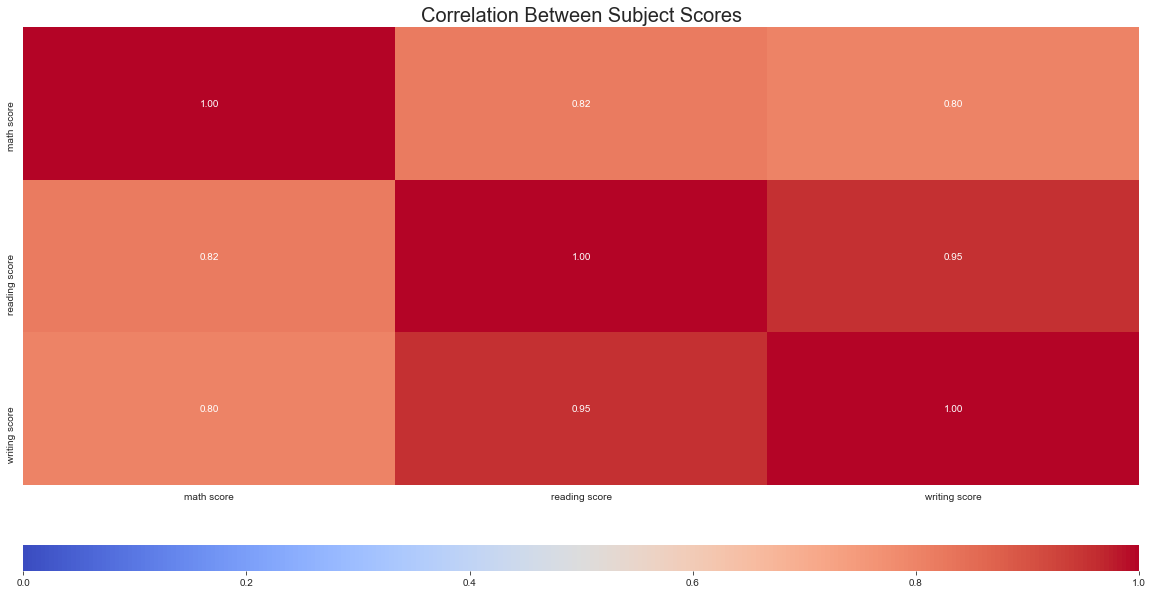

In [22]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(20,10))
sns.heatmap(students_df.corr(),
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('Correlation Between Subject Scores', size = 20);

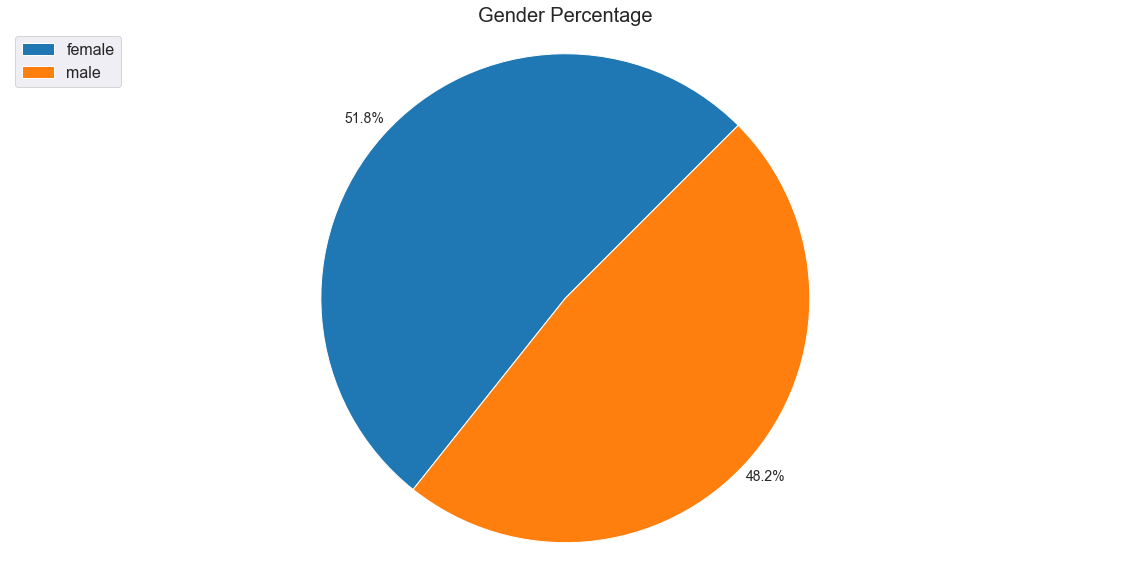

In [24]:
gender_counts = students_df["gender"].value_counts()
ax = gender_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Gender Percentage', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=gender_counts.index, loc="upper left", fontsize=16);

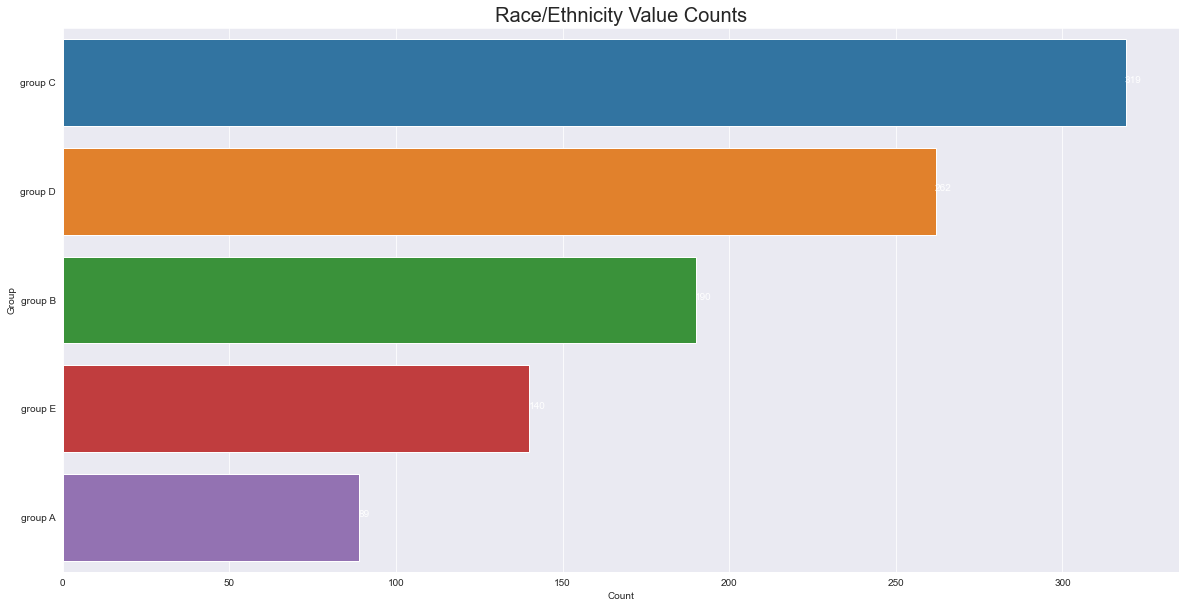

In [33]:
race_value_counts = students_df['race/ethnicity'].value_counts()

plt.figure(figsize=(20,10))
ax = sns.barplot(x=race_value_counts.values, y=race_value_counts.index, orient='h')
ax.set_title("Race/Ethnicity Value Counts", size=20)
ax.set(xlabel="Count", ylabel="Group")

# Annotate value labels to each type
for index, value in enumerate(race_value_counts): 
    plt.annotate(value, xy=(value-0.25, index), color='white') 

<Figure size 1440x720 with 0 Axes>

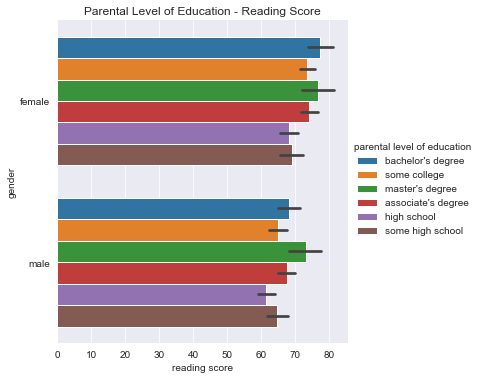

In [50]:
plt.figure(figsize=(20,10))
sns.catplot(x="reading score",
            y="gender", 
            hue="parental level of education",
            data=students_df,
            kind="bar")
plt.title('Parental Level of Education - Reading Score')
plt.show()

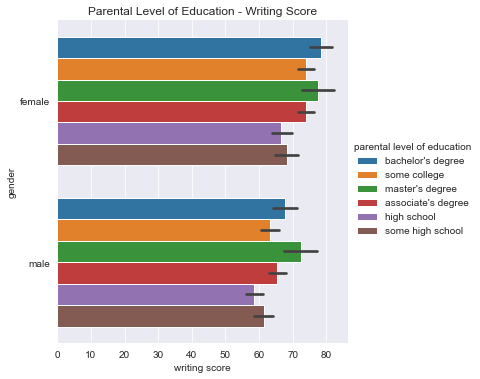

In [49]:
sns.catplot(x="writing score",
            y="gender", 
            hue="parental level of education",
            data=students_df, 
            kind="bar")
plt.title('Parental Level of Education - Writing Score')
plt.show()

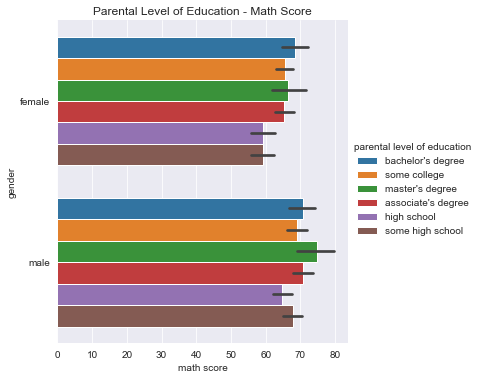

In [43]:
sns.catplot(x="math score",
            y="gender", 
            hue="parental level of education",
            data=students_df, 
            kind="bar")
plt.title('Parental Level of Education - Math Score')
plt.show()

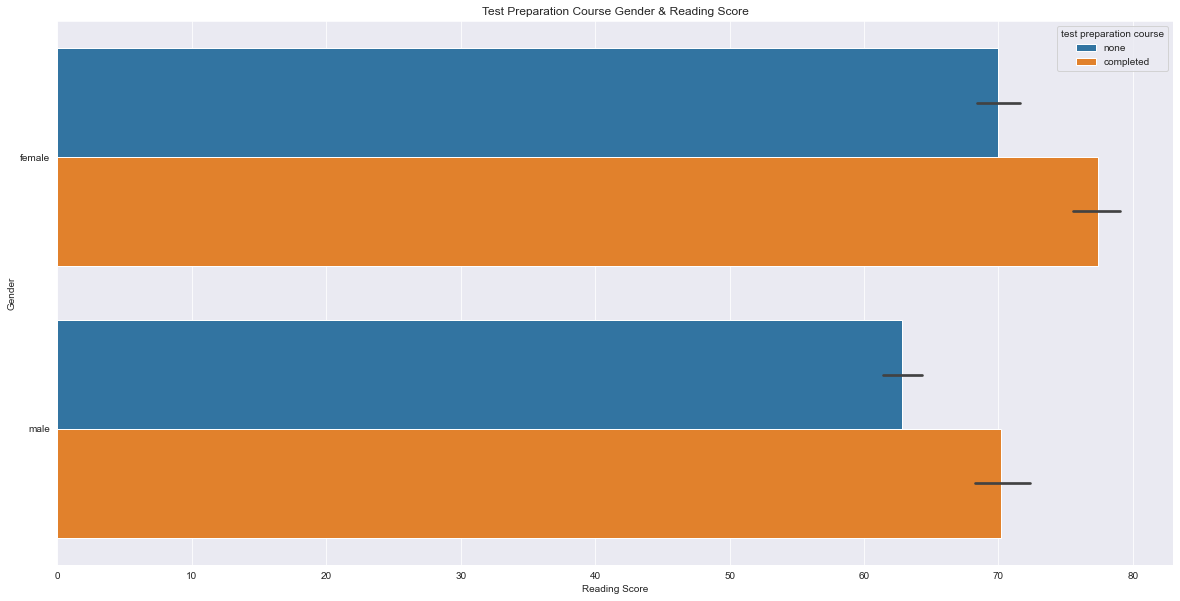

In [56]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y="gender", x="reading score", orient='h', hue="test preparation course", data=students_df)
ax.set(title='Test Preparation Course Gender & Reading Score', 
       xlabel='Reading Score',
       ylabel="Gender");

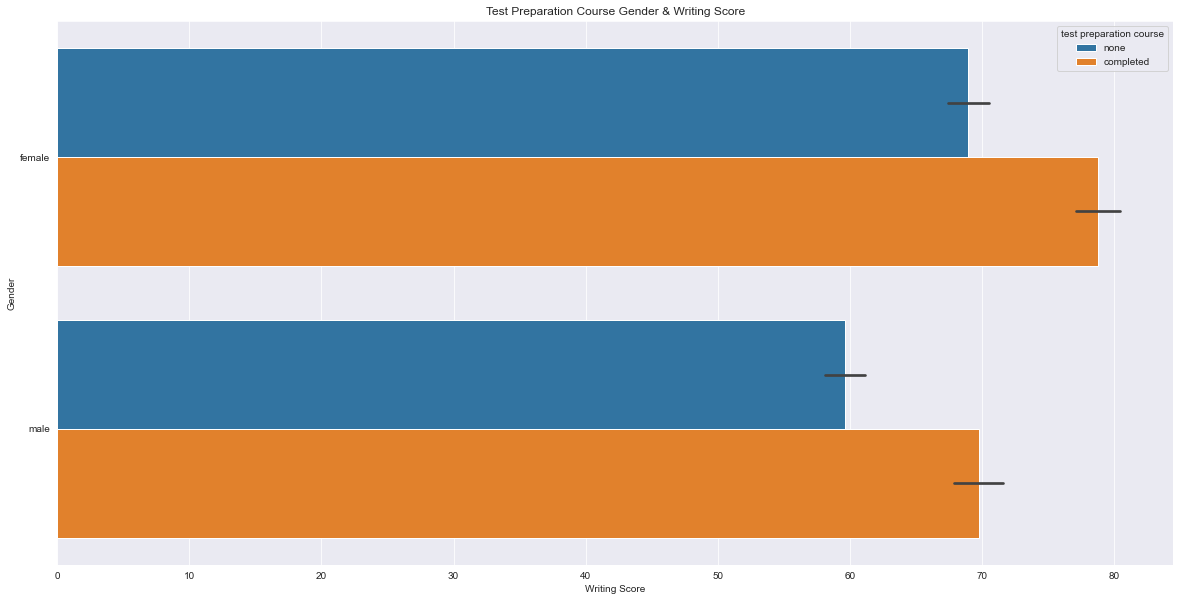

In [57]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y="gender", x="writing score", orient='h', hue="test preparation course", data=students_df)
ax.set(title='Test Preparation Course Gender & Writing Score', 
       xlabel='Writing Score',
       ylabel="Gender");

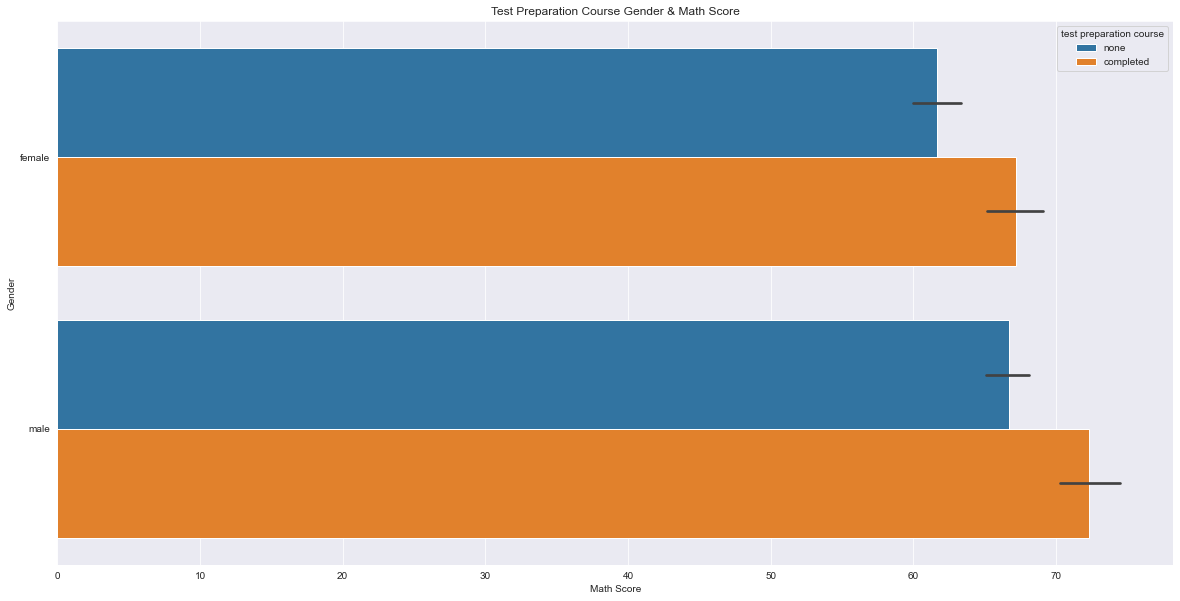

In [58]:
plt.figure(figsize=(20,10))
ax = sns.barplot(y="gender", x="math score", orient='h', hue="test preparation course", data=students_df)
ax.set(title='Test Preparation Course Gender & Math Score', 
       xlabel='Math Score',
       ylabel="Gender");

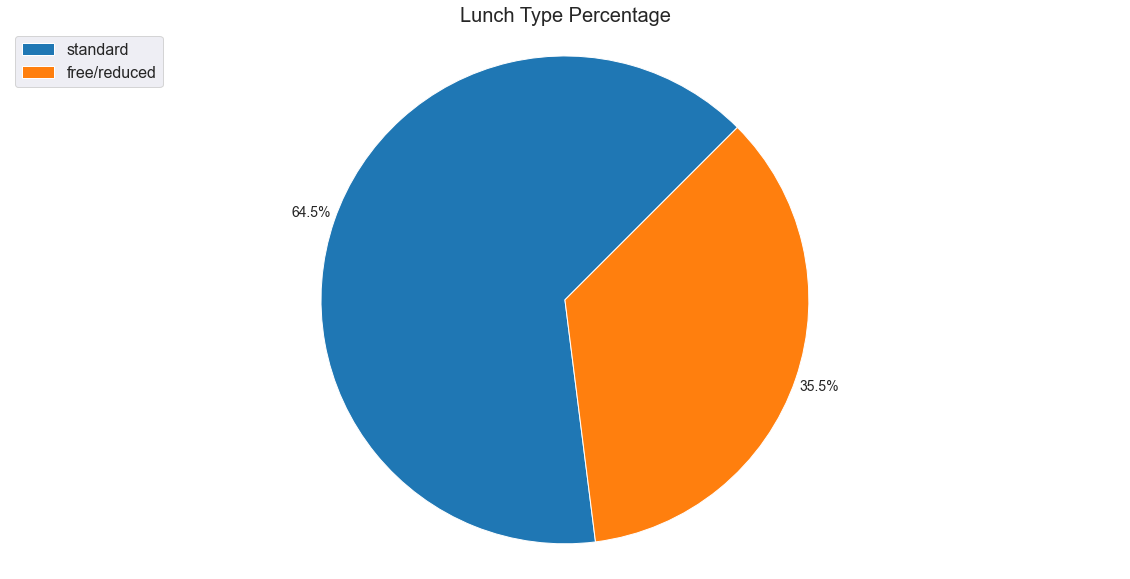

In [59]:
gender_counts = students_df["lunch"].value_counts()
ax = gender_counts.plot(kind='pie',
             figsize = (20,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Lunch Type Percentage', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=gender_counts.index, loc="upper left", fontsize=16);

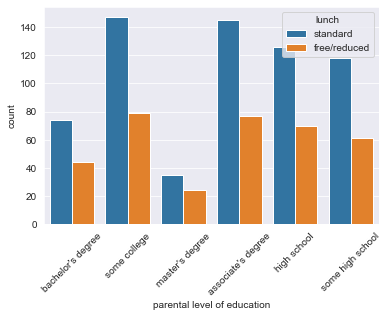

In [62]:
sns.countplot(x="parental level of education", hue="lunch",
                 data=students_df)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

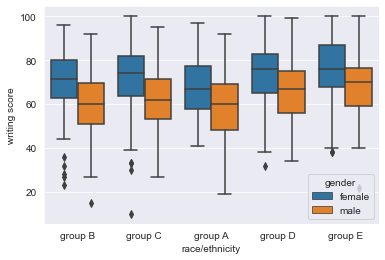

In [64]:
sns.boxplot(x=students_df['race/ethnicity'],y=students_df['reading score'],hue=students_df['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='writing score'>

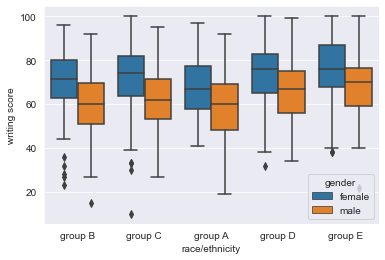

In [65]:
sns.boxplot(x=students_df['race/ethnicity'],y=students_df['writing score'],hue=students_df['gender'])

<AxesSubplot:xlabel='race/ethnicity', ylabel='math score'>

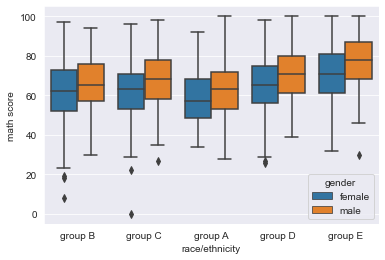

In [66]:
sns.boxplot(x=students_df['race/ethnicity'],y=students_df['math score'],hue=students_df['gender'])

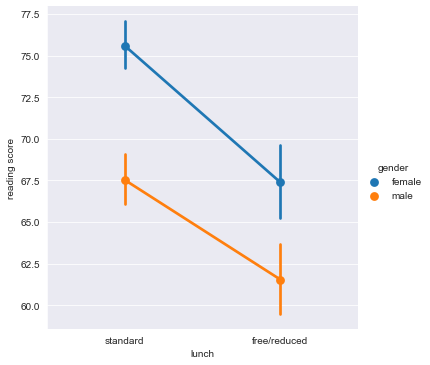

In [71]:
sns.factorplot(x="lunch", y="reading score", hue="gender", data=students_df)

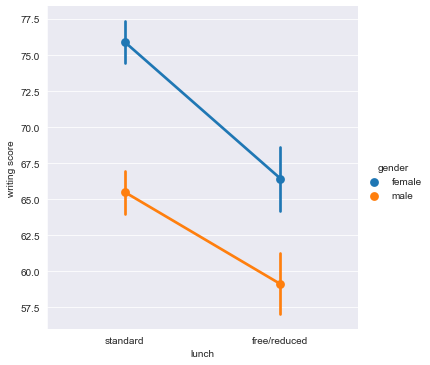

In [70]:
sns.factorplot(x="lunch", y="writing score", hue="gender", data=students_df)

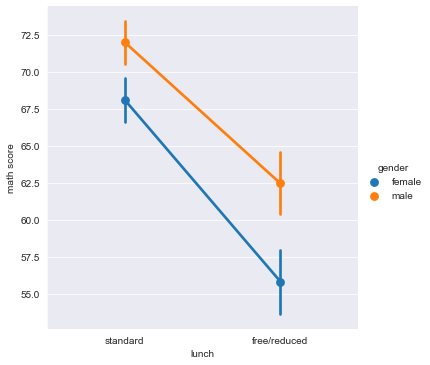

In [72]:
sns.factorplot(x="lunch", y="math score", hue="gender", data=students_df)

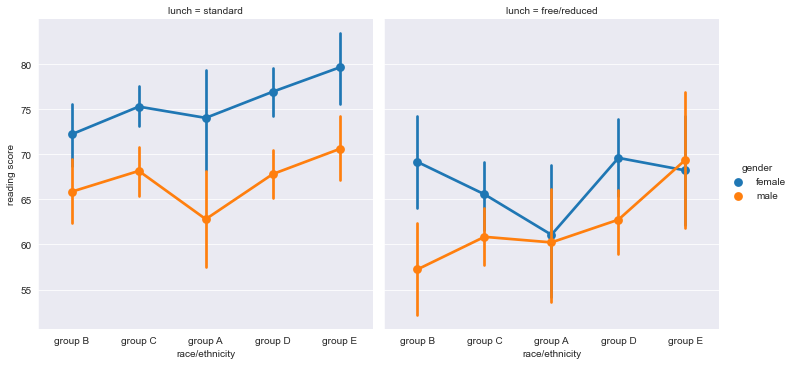

In [75]:
sns.factorplot(x="race/ethnicity", y="reading score", hue="gender",col='lunch',data=students_df)

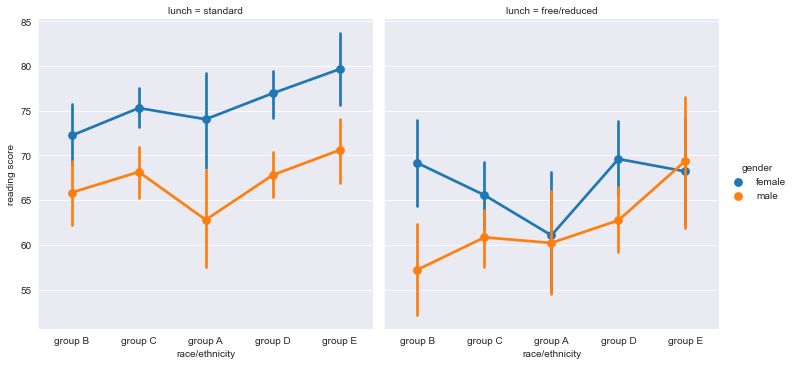

In [76]:
sns.factorplot(x="race/ethnicity", y="reading score", hue="gender",col='lunch',data=students_df)

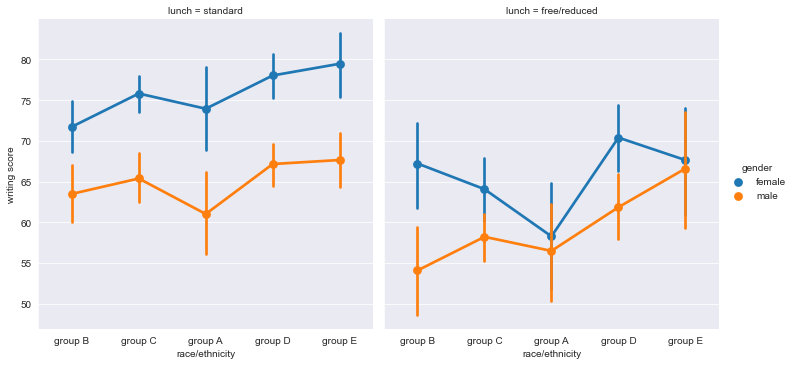

In [77]:
sns.factorplot(x="race/ethnicity", y="writing score", hue="gender",col='lunch',data=students_df)

<AxesSubplot:xlabel='math score', ylabel='reading score'>

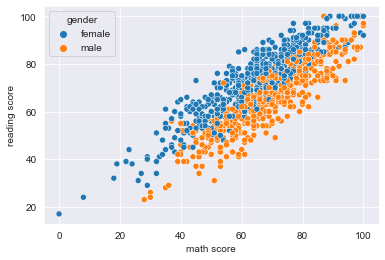

In [79]:
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="math score", y="reading score",
                hue="gender", data=students_df)

<AxesSubplot:xlabel='math score', ylabel='writing score'>

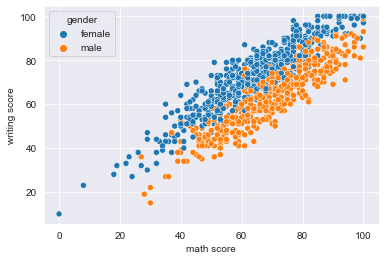

In [80]:
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="math score", y="writing score",
                hue="gender", data=students_df)

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

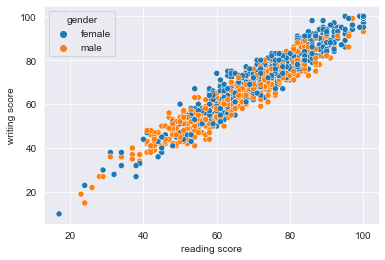

In [81]:
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="reading score", y="writing score",
                hue="gender", data=students_df)

# References

1. https://www.kaggle.com/kralmachine/seaborn-tutorial-for-beginners